[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/open-data-analysis-input.ipynb)


# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 `상가(상권)정보_의료기관_201909`를 다운로드 받아봅니다.

## 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## 시각화를 위한 폰트 설정

In [2]:

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

# import koreanize_matplotlib

## 데이터 로드하기
* 판다스에서 데이터를 로드할 때는 read_csv를 사용합니다.
* 데이터를 로드해서 df라는 변수에 담습니다.
* 그리고 shape 를 통해 데이터의 갯수를 찍습니다. 결과는 (행, 열) 순으로 출력됩니다.

In [3]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic') 
# plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며 
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [4]:
from IPython.display import set_matplotlib_formats
#폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

C:\Users\LG\AppData\Local\Temp\ipykernel_8308\169946400.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## 데이터 미리보기
* head, tail 을 통해 데이터를 미리 볼 수 있습니다.

In [110]:
# shift + tab 키를 누르시면 docstring 을 볼 수 있습니다.
# head 로 데이터를 미리보기 합니다.
df = pd.read_csv("C:/Users/LG/cmder/data/data/hospital.csv", low_memory=False)
print(df.shape)
df.head()

(91335, 39)


상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  19956873     하나산부인과  NaN         S       의료       S01       병원    S01B10   
1  20024149   타워광명내과의원  NaN         S       의료       S01       병원    S01B07   
2  20152277  조정현신경외과의원  NaN         S       의료       S01       병원    S01B15   
3  20350610   한귀원정신과의원  NaN         S       의료       S01       병원    S01B99   
4  20364049  더블유스토어수지점  수지점         S       의료       S02   약국/한약방    S02A01   

  상권업종소분류명 표준산업분류코드  ...                     건물관리번호      건물명  \
0     산부인과   Q86201  ...  4127310900110810000010857  산호한양아파트   
1    내과/외과   Q86201  ...  1168011800104670014000001      NaN   
2     신경외과   Q86201  ...  4139013200117400001017064    한라프라자   
3     기타병원      NaN  ...  2650010400100740001009932      NaN   
4       약국   G47811  ...  4146510100107120002026238      NaN   

                 도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
0   경기도 안산시 단원구 달미로 10  425764.0  15236.0  NaN  NaN  NaN  126.814295   
1  서울특별시 강남구 언주로30길 39  135270.0   6292.0  NaN    4  NaN  127.053198   
2    경기도 시흥시 중심상가로 178  429450.0  15066.0  NaN  NaN  NaN  126.734841   
3    부산광역시 수영구 수영로 688  613100.0  48266.0  NaN    5  NaN  129.115438   
4   경기도 용인시 수지구 문정로 32  448170.0  16837.0  NaN    1  NaN  127.095522   

          위도  
0  37.336344  
1  37.488742  
2  37.344955  
3  35.166872  
4  37.323528  

[5 rows x 39 columns]

In [6]:
# tail 로 마지막 부분에 있는 데이터를 불러옵니다.
df.tail()

상가업소번호           상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
91330  16196725         온누리약국   베스트         S       의료       S02    약국/한약방   
91331  16192180            리원  봄산후조         S       의료       S07  의료관련서비스업   
91332  16127538       참좋은요양병원   NaN         S       의료       S01        병원   
91333  16108681       경희중앙한의원   NaN         S       의료       S01        병원   
91334  16109073  천안김안과천안역본점의원   NaN         S       의료       S01        병원   

      상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호    건물명  \
91330    S02A01       약국   G47811  ...  3017011200115070000021096    NaN   
91331    S07A07    산후조리원   S96993  ...  4128112300111460000011715  청한프라자   
91332    S01B17  노인/치매병원   Q86102  ...  2641010800105380001005572  한신시티빌   
91333    S01B06      한의원   Q86203  ...  1174010500103450009002392    NaN   
91334    S01B13     안과의원   Q86201  ...  4413110700102660017016314    김안과   

                     도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
91330      대전광역시 서구 문예로 67  302831.0  35240.0  NaN  NaN  NaN  127.389865   
91331   경기도 고양시 덕양구 성신로 14  412827.0  10503.0  NaN  NaN  NaN  126.830144   
91332    부산광역시 금정구 금강로 209  609841.0  46294.0  NaN    2  NaN  129.082790   
91333    서울특별시 강동구 천중로 213  134811.0   5303.0  NaN  NaN  NaN  127.143958   
91334  충청남도 천안시 동남구 중앙로 92  330952.0  31127.0  NaN  NaN  NaN  127.152651   

              위도  
91330  36.352728  
91331  37.627530  
91332  35.227138  
91333  37.540993  
91334  36.806640  

[5 rows x 39 columns]

In [7]:
# sample 로 미리보기를 합니다.
df.sample()

상가업소번호      상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
21555  8781808  사람의치과의원  NaN         S       의료       S01       병원    S01B04   

      상권업종소분류명 표준산업분류코드  ...                     건물관리번호  건물명  \
21555     치과의원   Q86202  ...  1156011000100120005031106  NaN   

                       도로명주소     구우편번호   신우편번호  동정보 층정보  호정보          경도  \
21555  서울특별시 영등포구 국회대로76길 33  150869.0  7241.0  NaN   6  NaN  126.924167   

              위도  
21555  37.529527  

[1 rows x 39 columns]

## 데이터 요약하기

### 요약정보

In [8]:
# info로 데이터의 요약을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 컬럼명 보기

In [9]:
# 컬럼명만 출력해 봅니다.
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 데이터 타입

In [10]:
# 데이터 타입만 출력합니다.
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 결측치

In [11]:
null_count = df.isnull().sum() # True는 1을 의ㅣ한다. 따라서 df.isnull().sum()을 하면 결측치의 개수를 파악할 수 있다
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<AxesSubplot:>

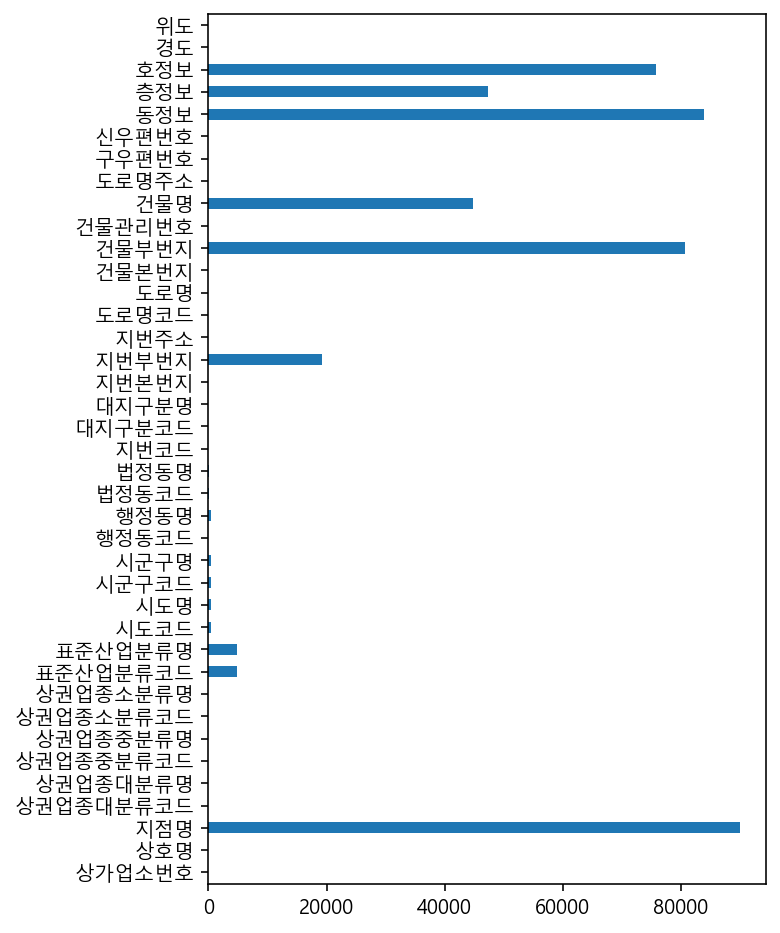

In [12]:
# 위에서 구한 결측치를 .plot.bar 를 통해 막대그래프로 표현합니다. 
null_count.plot.barh(figsize = (5,8)) # 글자가 잘 보이기 않을때, (rot = 30) 하거나, (figsize=(5,7))로 그래프 사이즈를 수정한다

In [13]:
# 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어 줍니다.
# df_null_count 변수에 결과를 담아서 head 로 미리보기를 합니다.
df_null_count = null_count.reset_index()
df_null_count.head()

index      0
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

## 컬럼명 변경하기

In [14]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경해 줍니다.
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

컬럼명   결측치수
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

## 정렬하기

In [15]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values 를 통해 정렬해서
# 결측치가 많은 순으로 상위 10개만 출력합니다.

df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10)
df_null_count_top

컬럼명   결측치수
2        지점명  89989
34       동정보  83929
28     건물부번지  80731
36       호정보  75784
35       층정보  47291
30       건물명  44882
23     지번부번지  19256
9   표준산업분류코드   4922
10   표준산업분류명   4922
11      시도코드    379

## 특정 컬럼만 불러오기

In [16]:
# 지점명 컬럼을 불러옵니다.
# NaN == Not a Number의 약자로 결측치를 의미합니다.

df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [17]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담습니다.

drop_columns = df_null_count_top["컬럼명"].tolist() # tolist()는 dataframe형태를 list형태로 변경시켜줌
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [18]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옵니다.
df[drop_columns].head()

지점명  동정보  건물부번지  호정보  층정보      건물명  지번부번지 표준산업분류코드         표준산업분류명  시도코드
0  NaN  NaN    NaN  NaN  NaN  산호한양아파트    NaN   Q86201           일반 의원  41.0
1  NaN  NaN    NaN  NaN    4      NaN   14.0   Q86201           일반 의원  11.0
2  NaN  NaN    NaN  NaN  NaN    한라프라자    1.0   Q86201           일반 의원  41.0
3  NaN  NaN    NaN  NaN    5      NaN    1.0      NaN             NaN  26.0
4  수지점  NaN    NaN  NaN    1      NaN    2.0   G47811  의약품 및 의료용품 소매업  41.0

## 제거하기

In [19]:
print(df.shape)
df = df.drop(drop_columns, axis = 1)
# 행을 기준으로 drop을 시킬 것이기 때문에 axis = 1로 바꿔야함
# inplace = True 로 설정해도 되지만 놀란이 많은 기능이기 때문에 추천하지 않는다
print(df.shape)

(91335, 39)
(91335, 29)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 기초 통계값 보기

### 기초 통계 수치

In [21]:
# 평균값
df["위도"].mean() # 평균값이 중앙값에 비해서 최댓값과 최솟값의 영향을 많이 받음
# 중앙값보다 값이 작으니 최솟값의 영향을 많이 받았다고 볼 수 있음

36.62471119236685

In [22]:
# 중앙값
df["위도"].median()

37.2346523177033

In [23]:
# 최댓값
df["위도"].max()

38.4996585705598

In [24]:
# 최솟값
df["위도"].min()

33.2192896688307

In [25]:
# 개수
df["위도"].count()

91335

### 기초통계값 요약하기 - describe

describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
기본적으로 수치형 데이터를 요약해서 보여줍니다.
데이터의 갯수, 평균, 표준편차, 최솟값, 
1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.

In [26]:
# 위도를 describe로 요약해 봅니다.

df["위도"].describe() # 50% 중앙값->2사분위수

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [27]:
# 2개의 컬럼을 describe 로 요약합니다.

df[["위도","경도"]] 

# 2개의 이상의 컬럼을 가져올때는 list 형태만 가능한다는 것에 유념한다

위도          경도
0      37.336344  126.814295
1      37.488742  127.053198
2      37.344955  126.734841
3      35.166872  129.115438
4      37.323528  127.095522
...          ...         ...
91330  36.352728  127.389865
91331  37.627530  126.830144
91332  35.227138  129.082790
91333  37.540993  127.143958
91334  36.806640  127.152651

[91335 rows x 2 columns]

In [28]:
df[["위도","경도"]].describe()

위도            경도
count  91335.000000  91335.000000
mean      36.624711    127.487524
std        1.041361      0.842877
min       33.219290    124.717632
25%       35.811830    126.914297
50%       37.234652    127.084550
75%       37.507463    128.108919
max       38.499659    130.909912

In [29]:
# describe로 문자열 데이터타입의 요약을 봅니다.

df.describe(include="object") 

# describe의 기본은 수치형 데이터만을 가지고 사용
# describe(include="object")는 문자형 데이터를 가지고 옮
# top : 가장 많이 언급된 값
# freq : 빈도수 ex) 리원이라는 값이 152번 언급, 약국이 18964번 언급
# 위의 코드에서 결측치는 제외하고 보여진다.

# df.describe(include="all")을 하면 위에는 문자형 자료가 아래는 수치형 자료, 두개 다 표시된다. 


상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명    시도명  \
count   91335     91335    91335     91335    91335     91335    91335  90956   
unique  56910         1        1         5        5        34       34     17   
top        리원         S       의료       S01       병원    S02A01       약국    경기도   
freq      152     91335    91335     60774    60774     18964    18964  21374   

         시군구명   행정동명   법정동명  대지구분명                  지번주소             도로명  \
count   90956  90956  91280  91335                 91335           91335   
unique    228   2791   2822      2                 53118           16610   
top        서구    중앙동     중동     대지  서울특별시 동대문구 제기동 965-1  서울특별시 강남구 강남대로   
freq     3165   1856    874  91213                   198             326   

                           건물관리번호                  도로명주소  
count                       91335                  91335  
unique                      54142                  54031  
top     1123010300109650001031604  서울특별시 동대문구 약령중앙로8길 10  
freq                          198                    198

### 중복제거한 값 보기
* unique 로 중복을 제거한 값을 보고 nunique 로 갯수를 세어봅니다.

In [70]:
# "상권업종대분류명"
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [71]:
df["상권업종대분류명"].nunique() # nunique : unique 한 값이 몇개 있는지 찾는 것

1

In [72]:
# "상권업종중분류명"
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [73]:
df["상권업종중분류명"].nunique()

5

In [74]:
# "상권업종소분류명"
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [75]:
df["상권업종소분류명"].nunique()

34

In [76]:
# nunique 대신 len 을 사용할 수도 있습니다.
len(df["상권업종소분류명"].unique())

34

### 그룹화된 요약값 보기 - value_counts
* value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.

In [78]:
# value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.
# 시도코드를 세어봅니다.
df["시도명"].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [89]:
# 시도명을 세어봅니다.

city = df["시도명"].value_counts()
city
# 각각의 시도명이 얼마나 나오는지, 반복되는 지 볼때 사용

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [83]:
# normalize=True 옵션을 사용하면 비율을 구할 수 있습니다.

city_normalize = df["시도명"].value_counts(normalize = True)
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

In [112]:
city_top = city.sort_values(ascending=False)
city_frame = pd.DataFrame(city_top)
city_frame

시도명
경기도      21374
서울특별시    18943
부산광역시     6473
경상남도      4973
인천광역시     4722
대구광역시     4597
경상북도      4141
전라북도      3894
충청남도      3578
전라남도      3224
광주광역시     3214
대전광역시     3067
충청북도      2677
강원도       2634
울산광역시     1997
제주특별자치도   1095
세종특별자치시    353

<AxesSubplot:>

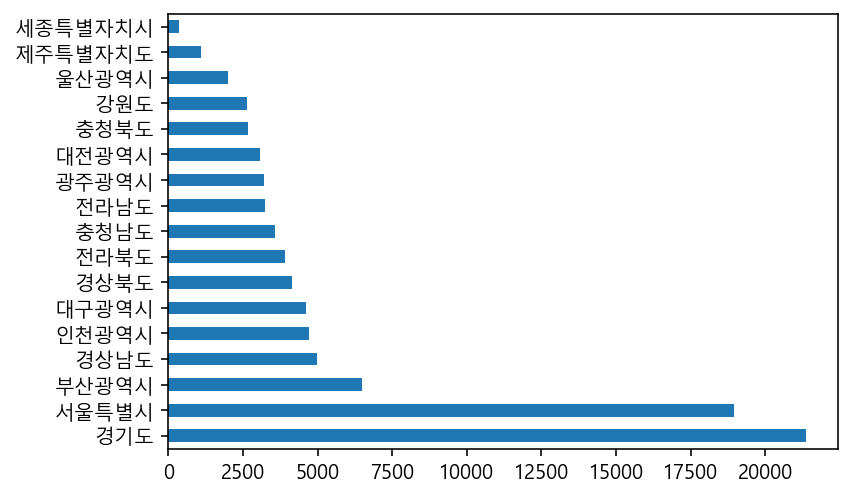

In [102]:
city_top.plot.barh()

<AxesSubplot:>

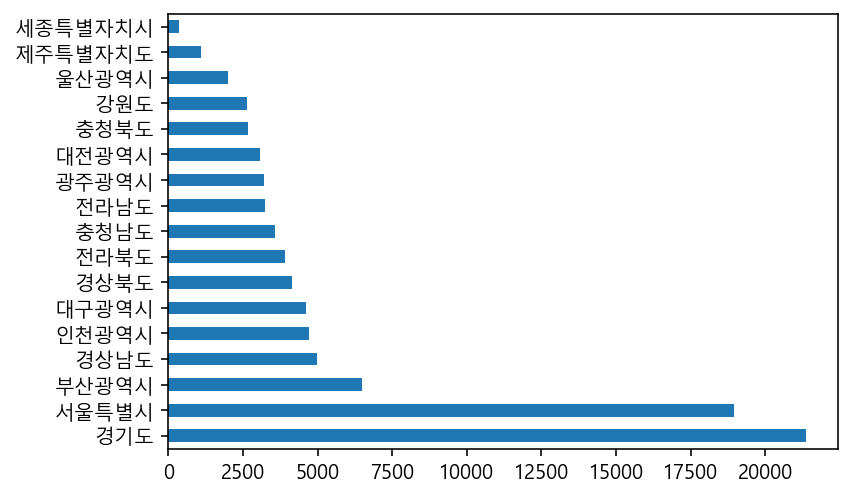

In [90]:
# Pandas 에는 plot기능을 내장하고 있습니다. 
# 위에서 분석한 시도명 수를 막대그래프로 표현해 봅니다.
city.plot.barh()

<AxesSubplot:ylabel='시도명'>

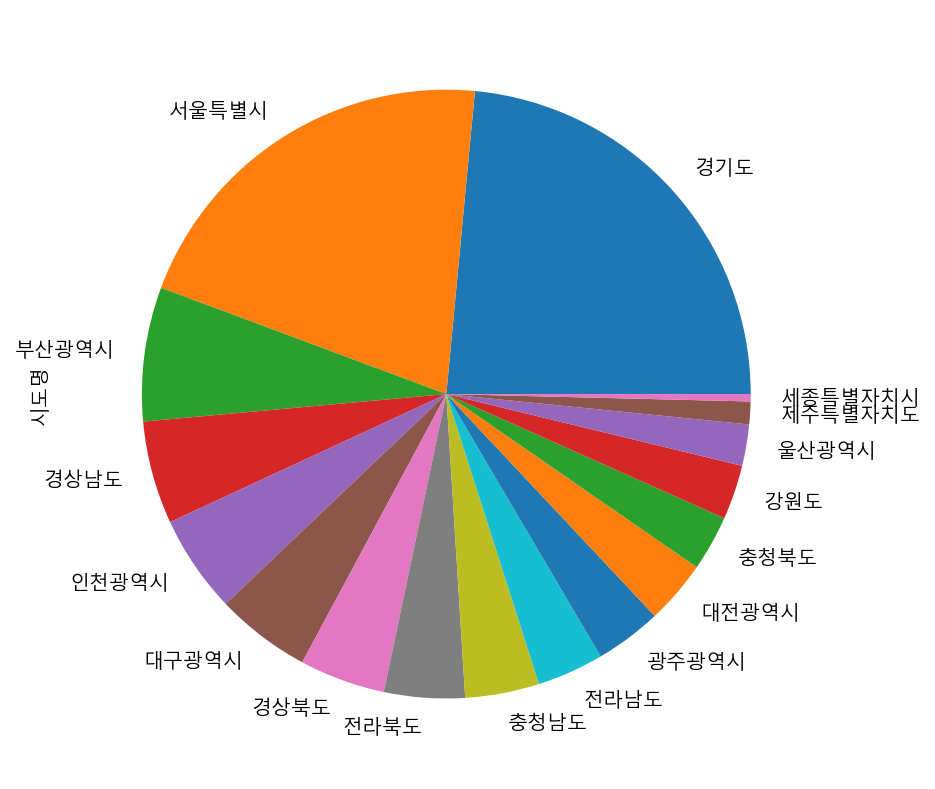

In [99]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.

city_normalize.plot.pie(figsize = (7,7)) # 좋지 않은 그래프

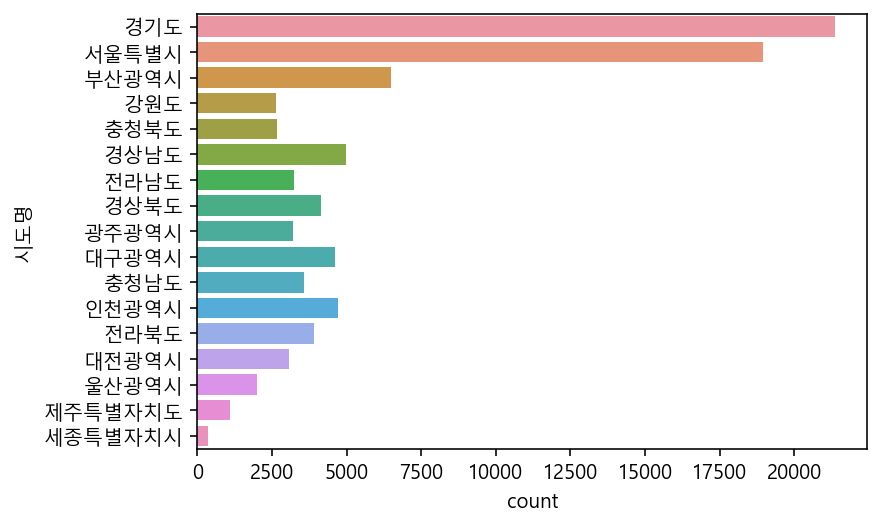

In [117]:
# seaborn의 countplot으로 그려봅니다.-> 느리다

c = sns.countplot(data = df, y="시도명")

In [119]:
# "상권업종대분류명"으로 갯수를 세어봅니다.

df["상권업종대분류명"].value_counts() 

# 변수와 변수의 개수를 나타냄 -> 여기서 결측치는 제거가 되어서 표시된다

의료    91335
Name: 상권업종대분류명, dtype: int64

In [124]:
# "상권업종중분류명"으로 갯수를 세어봅니다.

c = df["상권업종중분류명"].value_counts()
c

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [126]:
# normalize=True 를 사용해 비율을 구해봅니다.

n = df["상권업종중분류명"].value_counts(normalize=True)
n

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

<AxesSubplot:>

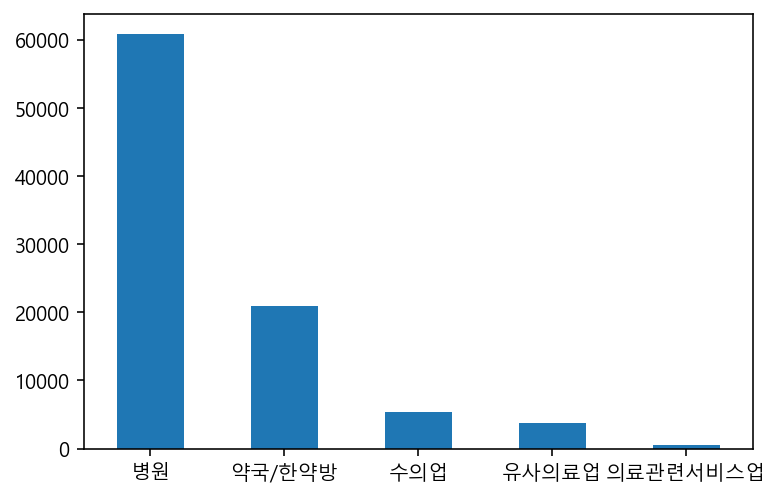

In [129]:
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다. 

c.plot.bar(rot = 0)

<AxesSubplot:ylabel='상권업종중분류명'>

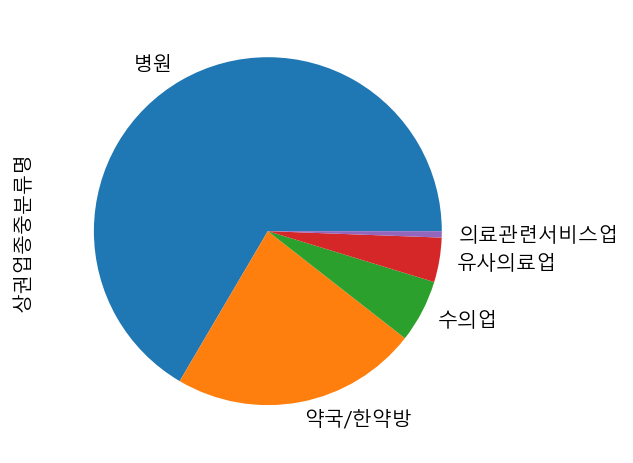

In [130]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
n.plot.pie()

In [139]:
# "상권업종소분류명" 에 대한 그룹화 된 값을 카운트 합니다.
s = df["상권업종소분류명"].value_counts(ascending=False)
s

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: 상권업종소분류명, dtype: int64

<AxesSubplot:>

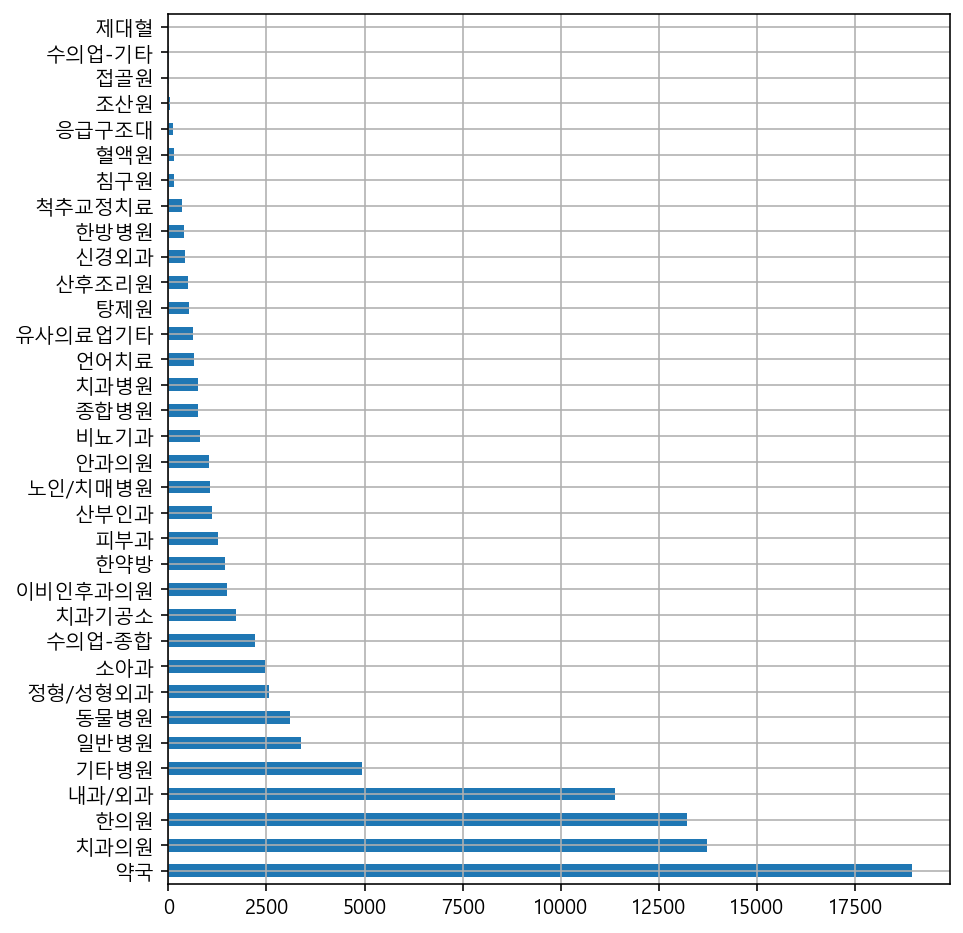

In [141]:
# "상권업종소분류명"으로 갯수를 세어봅니다.
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다. 
s.plot.barh(figsize = (7,8), grid = True)

## 데이터 색인하기
* 특정 데이터만 모아서 따로 봅니다.

In [148]:
# "상권업종중분류명"이 "약국/한약방"인 데이터만 가져와서 
# df_medical 이라는 변수에 담아봅니다.
# 그리고 head()를 통해 미리보기를 합니다.

df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()
df_medical.head(1)

상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
4  20364049  더블유스토어수지점  수지점         S       의료       S02   약국/한약방    S02A01   

  상권업종소분류명 표준산업분류코드  ...                     건물관리번호  건물명               도로명주소  \
4       약국   G47811  ...  4146510100107120002026238  NaN  경기도 용인시 수지구 문정로 32   

      구우편번호    신우편번호  동정보 층정보  호정보          경도         위도  
4  448170.0  16837.0  NaN   1  NaN  127.095522  37.323528  

[1 rows x 39 columns]

In [158]:
# "상권업종대분류명" 에서 "의료"만 가져옵니다.
# df.loc를 사용하면 행,열을 함께 가져올 수 있습니다.
# 이 기능을 통해 "상권업종중분류명" 만 가져옵니다. 
# 그리고 가져온 결과를 value_counts 를 통해 중분류의 갯수를 세어봅니다.
# shop_type

#  df[df["상권업종대분류명"]=="의료"]["상권업종중분류명"] -> 이렇게 하는 것보다
# 아래처럼 하는 것을 추천 -> 속도가 빠르다

m = df["상권업종대분류명"]=="의료"
df.loc[m,"상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [157]:
# 위와 똑같은 기능을 수행하는 코드입니다. 아래와 같이 한 줄에 표현할 수도 있습니다. 
# df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

In [166]:
# 유사의료업만 따로 모아봅니다.

df_medi = df[df["상권업종중분류명"]=="유사의료업"]
df_medi.shape

(3774, 39)

In [162]:
# 상호명을 그룹화해서 갯수를 세어봅니다.
# value_counts 를 사용해서 상위 10개를 출력합니다.

df["상호명"].value_counts().head()

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
Name: 상호명, dtype: int64

In [171]:
# 유사의료업만 df_medi 변수에 담겨져 있습니다.
# df_medi 변수에서 상호명으로 갯수를 세어봅니다. 
# 가장 많은 상호 상위 10개를 출력해 봅니다.

# [].value_counts() : 컬럼 지정 꼭 해야함, 알아서 큰 값부터 내림차순 정렬됨

df_medi["상호명"].value_counts().head(10)

리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: 상호명, dtype: int64

### 여러 조건으로 색인하기

In [178]:
# "상권업종소분류명"이 "약국" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
# df_seoul_drug
# &,| 연산자를 사용할 때는 소괄호를 사용하여야 한다!!!!

df_seoul_drug = df[(df["상권업종소분류명"]=="약국") & (df["시도명"]=="서울특별시")]
df_seoul_drug

상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
33     20816709      이즈타워약  NaN         S       의료       S02   약국/한약방   
51     20855710       진흥약국  NaN         S       의료       S02   약국/한약방   
130    21589838      신세계약국  NaN         S       의료       S02   약국/한약방   
136    22388303    메디팜한솔약국  NaN         S       의료       S02   약국/한약방   
141    22412563        명약국  NaN         S       의료       S02   약국/한약방   
...         ...        ...  ...       ...      ...       ...      ...   
91239  16131547     우리이웃약국  NaN         S       의료       S02   약국/한약방   
91275  16195709     더블유스토어  세계로         S       의료       S02   약국/한약방   
91288  16131839      종각팜약국  NaN         S       의료       S02   약국/한약방   
91301  16188650      온누리약국  우리네         S       의료       S02   약국/한약방   
91322  16091491  설연화한복감성약방  NaN         S       의료       S02   약국/한약방   

      상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
33       S02A01       약국   G47811  ...  1168010100108210001000001   
51       S02A01       약국   G47811  ...  1174010600106090000000001   
130      S02A01       약국   G47811  ...  1126010600106460000000300   
136      S02A01       약국   G47811  ...  1120010700103460012016935   
141      S02A01       약국   G47811  ...  1123010900102860121007257   
...         ...      ...      ...  ...                        ...   
91239    S02A01       약국   G47811  ...  1129013500100340003022753   
91275    S02A01       약국   G47811  ...  1153010200105010000000001   
91288    S02A01       약국   G47811  ...  1111013800100160006014311   
91301    S02A01       약국   G47811  ...  1153010200107980032000001   
91322    S02A01       약국   G47811  ...  1126010400101740001009985   

               건물명                  도로명주소     구우편번호   신우편번호  동정보  층정보  호정보  \
33            이즈타워     서울특별시 강남구 테헤란로 101  135080.0  6134.0  NaN    1  NaN   
51       둔촌푸르지오아파트      서울특별시 강동구 명일로 172  134767.0  5360.0  NaN  NaN  NaN   
130         금강리빙스텔      서울특별시 중랑구 신내로 211  131130.0  2024.0  NaN    1  NaN   
136         한진노변상가       서울특별시 성동구 행당로 82  133777.0  4717.0  NaN    1  NaN   
141            NaN   서울특별시 동대문구 망우로18나길 3  130090.0  2498.0  NaN    1  NaN   
...            ...                    ...       ...     ...  ...  ...  ...   
91239      종암선경아파트     서울특별시 성북구 종암로5길 26  136769.0  2811.0  NaN    1  116   
91275  신구로자이나인스에비뉴    서울특별시 구로구 구로중앙로 134  152731.0  8293.0    1    1  NaN   
91288      대한기독교서회        서울특별시 종로구 종로 68  110122.0  3189.0  NaN    1  NaN   
91301          NaN  서울특별시 구로구 디지털로27길 116  152875.0  8374.0  NaN  NaN  NaN   
91322          NaN       서울특별시 중랑구 공릉로 28  131848.0  2034.0  NaN  NaN  NaN   

               경도         위도  
33     127.028023  37.498656  
51     127.145055  37.534135  
130    127.092597  37.616424  
136    127.027513  37.556238  
141    127.060556  37.587349  
...           ...        ...  
91239  127.033908  37.594792  
91275  126.884285  37.499936  
91288  126.984930  37.569882  
91301  126.888070  37.484897  
91322  127.078082  37.613194  

[3579 rows x 39 columns]

### 구별로 보기

In [181]:
# 위에서 색인한 데이터로 "시군구명"으로 그룹화 해서 갯수를 세어봅니다.
# 구별로 약국이 몇개가 있는지 확인해 봅니다.

c = df_seoul_drug["시군구명"].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [183]:
# normalize=True 를 통해 비율을 구해봅니다.

n = df_seoul_drug["시군구명"].value_counts(normalize = True)
n.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

<AxesSubplot:>

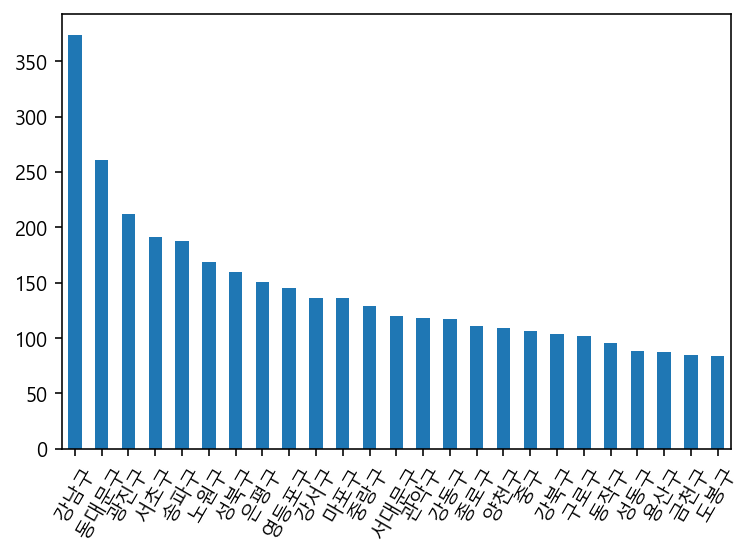

In [186]:
# 위에서 구한 결과를 판다스의 plot.bar()를 활용해 막대그래프로 그립니다.
c.plot.bar(rot=60)

In [190]:
# "상권업종소분류명"이 "종합병원" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
# 항상 "copy"를 해서 가져온다
# df_seoul_hospital

df_seoul_hospital = df[(df["상권업종소분류명"]=="종합병원") & (df["시도명"]=="서울특별시")].copy()
df_seoul_hospital

상가업소번호               상호명     지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
305    25155642            대진의료재단     NaN         S       의료       S01   
353    20471487            홍익병원별관     NaN         S       의료       S01   
385    20737057              SNUH     NaN         S       의료       S01   
1917   23210677  평화드림여의도성모병원의료기매장     NaN         S       의료       S01   
2461   20024045                한양     NaN         S       의료       S01   
...         ...               ...     ...       ...      ...       ...   
71991  28505952      서울성모병원응급의료센터  응급의료센터         S       의료       S01   
76508  12292992             라마르의원     NaN         S       의료       S01   
90492  16031909     가톨릭대학교여의도성모병원     NaN         S       의료       S01   
90581  16332576              씨엠병원     NaN         S       의료       S01   
90788  16162338            성베드로병원     NaN         S       의료       S01   

      상권업종중분류명 상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
305         병원    S01B01     종합병원   Q86101  ...  1121510100100580025000733   
353         병원    S01B01     종합병원   Q86101  ...  1147010100108970013001044   
385         병원    S01B01     종합병원   Q86101  ...  1168010100107360055027688   
1917        병원    S01B01     종합병원   Q86101  ...  1156011000100620000031477   
2461        병원    S01B01     종합병원   Q86101  ...  1120010700100150001019623   
...        ...       ...      ...      ...  ...                        ...   
71991       병원    S01B01     종합병원   Q86101  ...  1165010700101230000017226   
76508       병원    S01B01     종합병원   Q86101  ...  1174010900104530021010314   
90492       병원    S01B01     종합병원   Q86101  ...  1114012700100010001019574   
90581       병원    S01B01     종합병원   Q86101  ...  1156010500100900000035097   
90788       병원    S01B01     종합병원   Q86101  ...  1168011800109100027000895   

              건물명                  도로명주소     구우편번호   신우편번호  동정보  층정보  호정보  \
305     재단법인대순진리회     서울특별시 광진구 긴고랑로 119  143220.0  4944.0  NaN  NaN  NaN   
353        홍익병원별관     서울특별시 양천구 국회대로 250  158070.0  7937.0  NaN    1  NaN   
385          성보빌딩   서울특별시 강남구 테헤란로26길 10  135080.0  6236.0  NaN    4  NaN   
1917      여의도성모병원      서울특별시 영등포구 63로 10  150713.0  7345.0  NaN    1  NaN   
2461       한대동문회관     서울특별시 성동구 마조로 22-2  133070.0  4763.0  NaN    4  NaN   
...           ...                    ...       ...     ...  ...  ...  ...   
71991  가톨릭대학교성의교정     서울특별시 서초구 반포대로 222  137701.0  6591.0  NaN    1  NaN   
76508        원방빌딩  서울특별시 강동구 천호대로157길 18  134864.0  5335.0  NaN  NaN  NaN   
90492        명동성당        서울특별시 중구 명동길 74  100809.0  4537.0  NaN  NaN  NaN   
90581        충무병원  서울특별시 영등포구 영등포로36길 13  150030.0  7301.0  NaN  NaN  NaN   
90788       베드로병원   서울특별시 강남구 남부순환로 2649  135859.0  6271.0  NaN  NaN  NaN   

               경도         위도  
305    127.088279  37.559048  
353    126.862805  37.529213  
385    127.035825  37.499630  
1917   126.936693  37.518296  
2461   127.041325  37.559469  
...           ...        ...  
71991  127.005841  37.502382  
76508  127.127466  37.538485  
90492  126.986758  37.563662  
90581  126.903857  37.518807  
90788  127.039567  37.485604  

[91 rows x 39 columns]

In [191]:
# "시군구명" 으로 그룹화 해서 구별로 종합병원의 수를 세어봅니다.
df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: 시군구명, dtype: int64

### 텍스트 데이터 색인하기

In [197]:
# 색인하기 전에 상호명 중에 종합병원이 아닌 데이터 -> .str.contains + "~" 표시를 이용해라
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"),"상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [198]:
# 상호명에서 특정 단어가 들어가는 데이터만 가져옵니다. - 꽃배달

df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

상가업소번호            상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
2803  20895655  서울성모병원장례식장꽃배달  NaN         S       의료       S01       병원   
4644  22020310  강남성모병원장례식장꽃배달  NaN         S       의료       S01       병원   

     상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호   건물명  \
2803    S01B01     종합병원   Q86101  ...  1165010700105510000017194   NaN   
4644    S01B01     종합병원   Q86101  ...  1165010700105470006016762  이이빌딩   

                        도로명주소     구우편번호   신우편번호  동정보 층정보  호정보          경도  \
2803     서울특별시 서초구 사평대로28길 55  137040.0  6578.0    1   1  NaN  127.000682   
4644  서울특별시 서초구 반포대로39길 56-24  137040.0  6578.0  NaN   1  NaN  127.001756   

             위도  
2803  37.498257  
4644  37.499095  

[2 rows x 39 columns]

In [200]:
# 특정 단어가 들어가는 데이터만 가져옵니다. - 의료기
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("의료기")]

상가업소번호               상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
1917  23210677  평화드림여의도성모병원의료기매장  NaN         S       의료       S01       병원   

     상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호      건물명  \
1917    S01B01     종합병원   Q86101  ...  1156011000100620000031477  여의도성모병원   

                  도로명주소     구우편번호   신우편번호  동정보 층정보  호정보          경도         위도  
1917  서울특별시 영등포구 63로 10  150713.0  7345.0  NaN   1  NaN  126.936693  37.518296  

[1 rows x 39 columns]

In [208]:
# "꽃배달|의료기|장례식장|상담소|어린이집" 은 종합병원과 무관하기 때문에
# 전처리를 위해 해당 텍스트를 한번에 검색합니다.
# 제거할 데이터의 인덱스만 drop_row에 담아주고 list 형태로 변환합니다.
drop_row = df_seoul_hospital[
    df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index

drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [215]:
# 의원으로 끝나는 데이터도 종합병원으로 볼 수 없기 때문에 인덱스를 찾아서
# drop_row2에 담아주고 ist 형태로 변환합니다.

drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [217]:
# 삭제할 행을 drop_row에 합쳐줌
drop_row = drop_row + drop_row2
len(drop_row)

33

In [224]:
# 해당 셀을 삭제하고 사제 전과 후의 행의 갯수를 비교함
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis = 0)
print(df_seoul_hospital.shape)

# axis =0 : 행 기준, 1 : 열 기준

(91, 39)
(58, 39)


<AxesSubplot:>

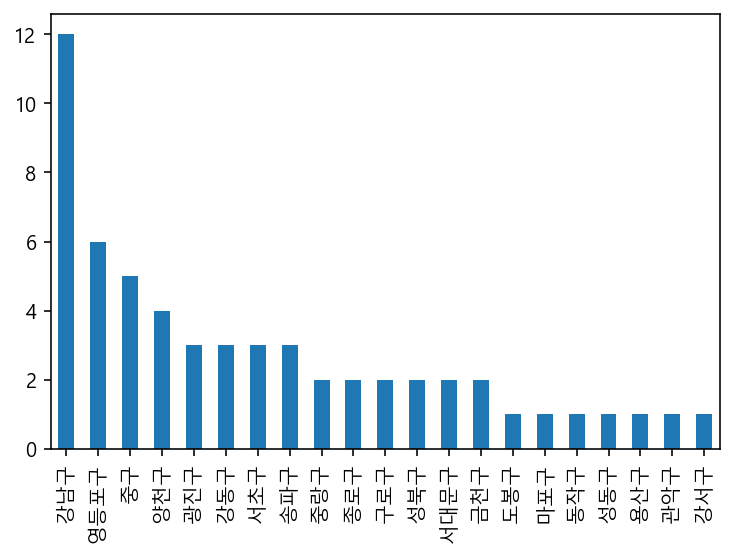

In [226]:
# 시군구명에 따라 종합병원의 숫자를 countplot으로 그림

df_seoul_hospital["시군구명"].value_counts().plot.bar()

<AxesSubplot:xlabel='시군구명', ylabel='count'>

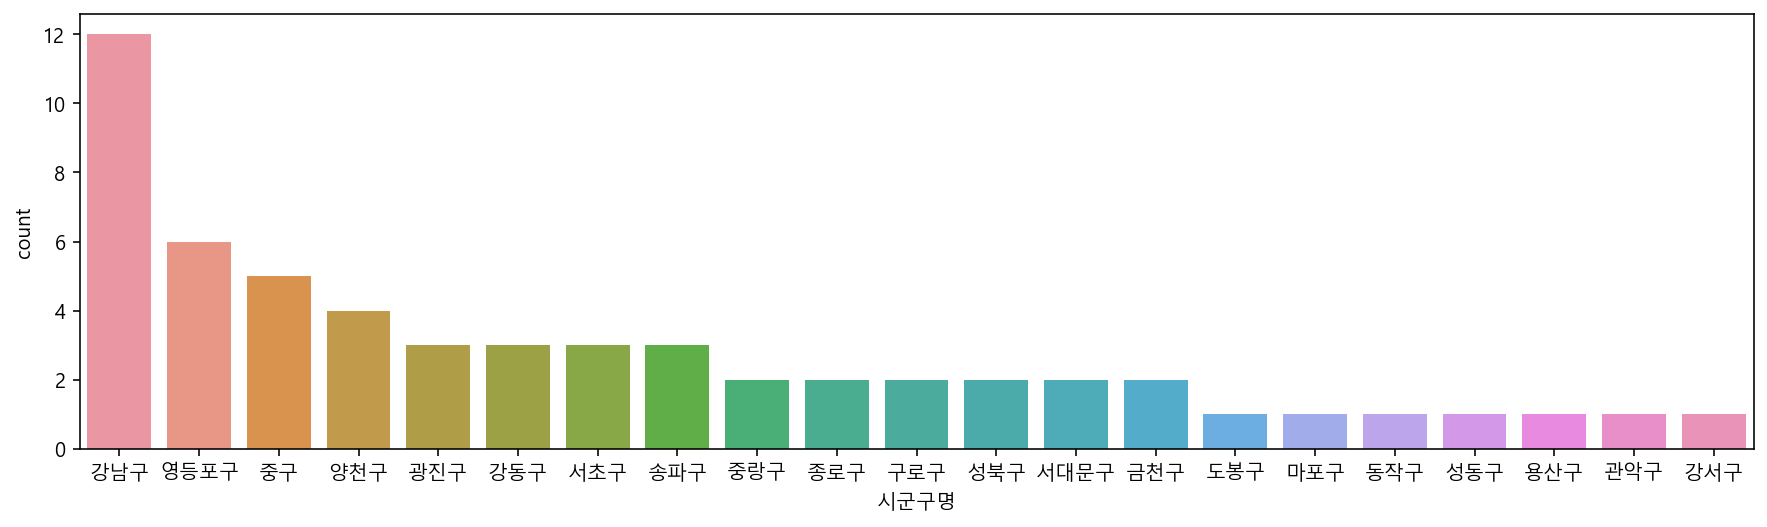

In [229]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul_hospital, x = "시군구명", order=df_seoul_hospital["시군구명"].value_counts().index)

In [231]:
df_seoul_hospital["상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

In [234]:
# str.contains 를 사용해서 "상호명"에 "대학병원"이 들어가는 것을 가져와서 head()로 미리보기 합니다.
a = df[df["상호명"].str.contains("대학병원")]
print(a.shape)
a

(12, 39)


상가업소번호           상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
193    23651380      동국대학병원일산  NaN         S       의료       S01       병원   
363    20632155  경북대학병원응급센터9층  NaN         S       의료       S01       병원   
2216   25401601    대구보건대학병원치과  NaN         S       의료       S01       병원   
8308   24935585        서남대학병원  NaN         S       의료       S01       병원   
9727   24126873       순천향대학병원  NaN         S       의료       S01       병원   
15622  22221708        영남대학병원  NaN         S       의료       S01       병원   
22719   8895847    학교법인을지대학병원  NaN         S       의료       S01       병원   
33290  26094226      대전을지대학병원  NaN         S       의료       S01       병원   
70213  22159419     이화카메라대학병원  NaN         S       의료       S01       병원   
70353  22256656       카메라대학병원  NaN         S       의료       S01       병원   
74009  11952630      가천의학대학병원  NaN         S       의료       S01       병원   
78363  12586433      뉴욕대학병원약국  NaN         S       의료       S02   약국/한약방   

      상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호        건물명  \
193      S01B01     종합병원   Q86101  ...  4128510100108090004022480  동국대학교일산병원   
363      S01B01     종합병원   Q86101  ...  2711010600100500000010507    경북대학교병원   
2216     S01B04     치과의원   Q86202  ...  2723012400109550004000001        NaN   
8308     S01B02     일반병원   Q86102  ...  2917010700112520009026940        NaN   
9727     S01B02     일반병원   Q86102  ...  4136010700103130001000713        NaN   
15622    S01B01     종합병원   Q86101  ...  2720010300103170001015885   영남대학교의료원   
22719    S01B02     일반병원   Q86102  ...  3017011200112680000021507        NaN   
33290    S01B02     일반병원   Q86102  ...  3017011200113060000020368     을지대학병원   
70213    S01B02     일반병원   Q86102  ...  4413111800105140000008702   주공아파트2단지   
70353    S01B02     일반병원   Q86102  ...  5013011600101670007015595     은정음악학원   
74009    S01B02     일반병원   Q86102  ...  2820010100111960006003250    JM외국어학원   
78363    S02A01       약국   G47811  ...  4159012800100410004000001        NaN   

                         도로명주소     구우편번호    신우편번호  동정보  층정보   호정보          경도  \
193        경기도 고양시 일산동구 동국로 27  410773.0  10326.0  NaN    1   NaN  126.805548   
363           대구광역시 중구 동덕로 130  700721.0  41944.0  NaN    9   NaN  128.604263   
2216      대구광역시 북구 동천로23길 30-3  702886.0  41422.0  NaN    1   NaN  128.557075   
8308      광주광역시 북구 설죽로202번길 79  500844.0  61183.0  NaN  NaN   NaN  126.901868   
9727         경기도 남양주시 강변북로 805  472060.0  12249.0  NaN  NaN   NaN  127.173787   
15622         대구광역시 남구 현충로 170  705717.0  42415.0  NaN    1   NaN  128.584185   
22719          대전광역시 서구 둔산로 77  302120.0  35233.0  NaN  NaN  1306  127.382420   
33290         대전광역시 서구 둔산서로 95  302799.0  35233.0  NaN    1   NaN  127.381989   
70213     충청남도 천안시 동남구 신부4길 18  330943.0  31125.0  NaN  NaN   NaN  127.162467   
70353  제주특별자치도 서귀포시 신서로32번길 18  697826.0  63566.0  NaN  NaN   NaN  126.506211   
74009      인천광역시 남동구 독점로3번길 38  405220.0  21565.0  NaN    1   NaN  126.708670   
78363     경기도 화성시 동탄중앙로 381-11  445170.0  18450.0  NaN    1   NaN  127.079059   

              위도  
193    37.676425  
363    35.866091  
2216   35.942787  
8308   35.177423  
9727   37.601450  
15622  35.847686  
22719  36.351563  
33290  36.355292  
70213  36.817046  
70353  33.253200  
74009  37.450212  
78363  37.216189  

[12 rows x 39 columns]

In [237]:
# str.startswith 를 사용해 "서울"로 시작하는 도로명주소를 가져와서 head()로 미리보기 합니다.
a = df[df["도로명주소"].str.startswith("서울")]
print(a.shape)
a

(18943, 39)


상가업소번호         상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
1      20024149    타워광명내과의원  NaN         S       의료       S01       병원   
8      20808534      코원성형외과  NaN         S       의료       S01       병원   
9      20755460    헬로스마일소아과  NaN         S       의료       S01       병원   
31     20872995    고운나라성형외과  NaN         S       의료       S01       병원   
33     20816709       이즈타워약  NaN         S       의료       S02   약국/한약방   
...         ...         ...  ...       ...      ...       ...      ...   
91318  16190911   동민피부과비뇨기과  NaN         S       의료       S01       병원   
91319  16108560  씨앤디자인치과기공소  NaN         S       의료       S03    유사의료업   
91320  16131813        월계치과  NaN         S       의료       S01       병원   
91322  16091491   설연화한복감성약방  NaN         S       의료       S02   약국/한약방   
91333  16108681     경희중앙한의원  NaN         S       의료       S01       병원   

      상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
1        S01B07    내과/외과   Q86201  ...  1168011800104670014000001   
8        S01B08  정형/성형외과   Q86201  ...  1168010700105920004010990   
9        S01B11      소아과   Q86201  ...  1168010800100390018000001   
31       S01B08  정형/성형외과   Q86201  ...  1174010800100090005004868   
33       S02A01       약국   G47811  ...  1168010100108210001000001   
...         ...      ...      ...  ...                        ...   
91318    S01B12     비뇨기과   Q86201  ...  1123010700102350001013495   
91319    S03B06    치과기공소   C27192  ...  1154510100100600025000001   
91320    S01B04     치과의원   Q86202  ...  1135010200109420000018688   
91322    S02A01       약국   G47811  ...  1126010400101740001009985   
91333    S01B06      한의원   Q86203  ...  1174010500103450009002392   

               건물명                 도로명주소     구우편번호   신우편번호  동정보  층정보   호정보  \
1              NaN   서울특별시 강남구 언주로30길 39  135270.0  6292.0  NaN    4   NaN   
8             이가빌딩     서울특별시 강남구 논현로 826  135893.0  6025.0  NaN    4   NaN   
9             성도빌딩  서울특별시 강남구 논현로131길 30  135010.0  6045.0  NaN    3   NaN   
31             NaN   서울특별시 강동구 천호대로 1032  134030.0  5379.0  NaN    3   NaN   
33            이즈타워    서울특별시 강남구 테헤란로 101  135080.0  6134.0  NaN    1   NaN   
...            ...                   ...       ...     ...  ...  ...   ...   
91318        미주아파트   서울특별시 동대문구 약령시로 147  130781.0  2489.0  NaN  NaN   NaN   
91319  에이스하이엔드타워6차     서울특별시 금천구 벚꽃로 234  153798.0  8513.0  NaN  NaN  1901   
91320     월계역신도브래뉴     서울특별시 노원구 월계로 338  139847.0  1885.0  NaN    2   201   
91322          NaN      서울특별시 중랑구 공릉로 28  131848.0  2034.0  NaN  NaN   NaN   
91333          NaN     서울특별시 강동구 천중로 213  134811.0  5303.0  NaN  NaN   NaN   

               경도         위도  
1      127.053198  37.488742  
8      127.028531  37.522223  
9      127.027878  37.514144  
31     127.126507  37.537333  
33     127.028023  37.498656  
...           ...        ...  
91318  127.045802  37.583788  
91319  126.886122  37.475986  
91320  127.057988  37.629326  
91322  127.078082  37.613194  
91333  127.143958  37.540993  

[18943 rows x 39 columns]

In [238]:
# str.endswith를 사용해서 "상호명"이 "병원"으로 끝나는 데이터를 가져와서 head()로 미리보기 합니다.
a = df[df["상호명"].str.endswith("병원")]
print(a.shape)
a

(5822, 39)


상가업소번호      상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
5      20809147   행신동물병원  NaN         S       의료       S04      수의업    S04A02   
12     21145534   목포동물병원  NaN         S       의료       S04      수의업    S04A02   
20     21085006   제일가축병원  NaN         S       의료       S04      수의업    S04A02   
21     21128898  다사랑요양병원  NaN         S       의료       S01       병원    S01B17   
25     21055738   축협동물병원  NaN         S       의료       S04      수의업    S04A02   
...         ...      ...  ...       ...      ...       ...      ...       ...   
91266  16121810   약손한방병원  NaN         S       의료       S01       병원    S01B05   
91289  16112694  더조은한방병원  NaN         S       의료       S01       병원    S01B05   
91290  16131196    ES장병원  NaN         S       의료       S01       병원    S01B07   
91299  16108691  더블유동물병원  NaN         S       의료       S04      수의업    S04A02   
91332  16127538  참좋은요양병원  NaN         S       의료       S01       병원    S01B17   

      상권업종소분류명 표준산업분류코드  ...                     건물관리번호      건물명  \
5         동물병원   M73100  ...  4128112800106470014011094      NaN   
12        동물병원   M73100  ...  4611010200110500078000665      NaN   
20        동물병원   M73100  ...  4136037021102040012005537      NaN   
21     노인/치매병원   Q86102  ...  2632010300101360002000001  다사랑요양병원   
25        동물병원   M73100  ...  4671025025103420000000164      NaN   
...        ...      ...  ...                        ...      ...   
91266     한방병원   Q86104  ...  2917012700108400002045390      NaN   
91289     한방병원   Q86104  ...  2911010800101680018008767      NaN   
91290    내과/외과   Q86201  ...  1162010100116730017032610      NaN   
91299     동물병원   M73100  ...  1162010100106220074027662      NaN   
91332  노인/치매병원   Q86102  ...  2641010800105380001005572    한신시티빌   

                             도로명주소     구우편번호    신우편번호  동정보  층정보  호정보  \
5              경기도 고양시 덕양구 행신로 147  412220.0  10517.0  NaN    1  NaN   
12              전라남도 목포시 영산로 200-1  530806.0  58708.0  NaN    1  NaN   
20     경기도 남양주시 퇴계원면 경춘북로558번길 7-7  472821.0  12126.0  NaN    1  NaN   
21                부산광역시 북구 덕천로 339  616110.0  46610.0  NaN    1  NaN   
25           전라남도 담양군 담양읍 삼거리길 8-6  517806.0  57347.0  NaN    1  NaN   
...                            ...       ...      ...  ...  ...  ...   
91266             광주광역시 북구 양일로 307  500867.0  61040.0  NaN  NaN  NaN   
91289              광주광역시 동구 동명로 55  501814.0  61432.0  NaN    1  NaN   
91290         서울특별시 관악구 남부순환로 1867  151849.0   8739.0  NaN  NaN  NaN   
91299             서울특별시 관악구 은천로 85  151826.0   8715.0  NaN  NaN  NaN   
91332            부산광역시 금정구 금강로 209  609841.0  46294.0  NaN    2  NaN   

               경도         위도  
5      126.831632  37.619309  
12     126.390244  34.799439  
20     127.146600  37.647633  
21     129.040773  35.209154  
25     126.981972  35.310645  
...           ...        ...  
91266  126.897411  35.202604  
91289  126.926691  35.151515  
91290  126.957319  37.479798  
91299  126.944700  37.487048  
91332  129.082790  35.227138  

[5822 rows x 39 columns]

### 특정 지역만 보기

In [239]:
# 서울에 있는 데이터의 위도와 경도를 봅니다.
# 결과를 df_seoul 이라는 데이터프레임에 저장합니다.
# 새로운 변수에 데이터프레임을 저장시 copy()를 사용합니다.
# df_seoul

df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 39)

<AxesSubplot:>

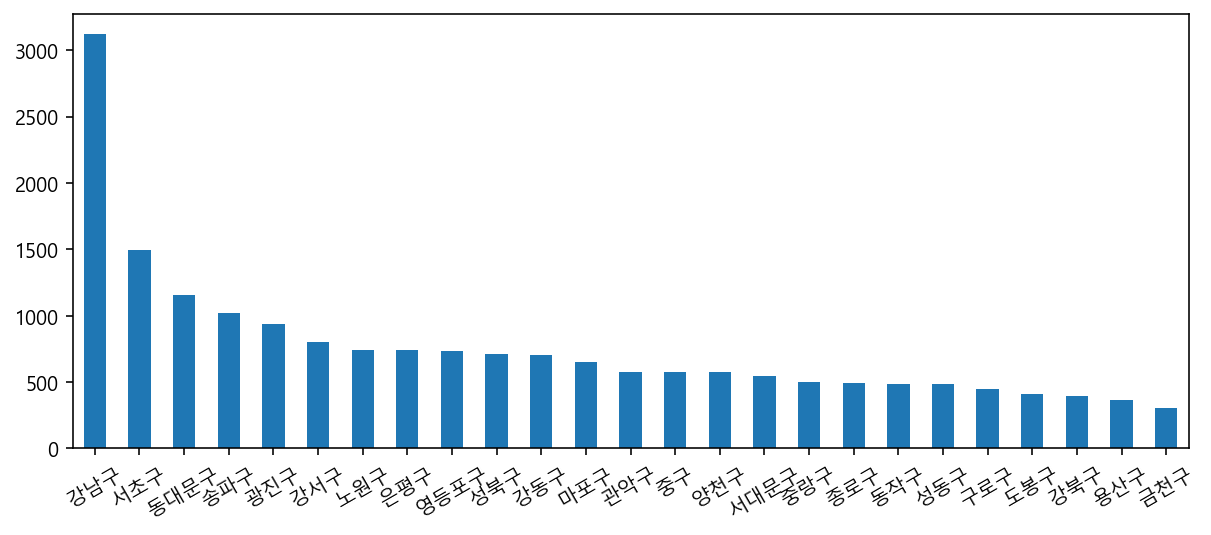

In [244]:
df_seoul["시군구명"].value_counts().plot.bar(figsize = (10,4), rot = 30)

<AxesSubplot:xlabel='시군구명', ylabel='count'>

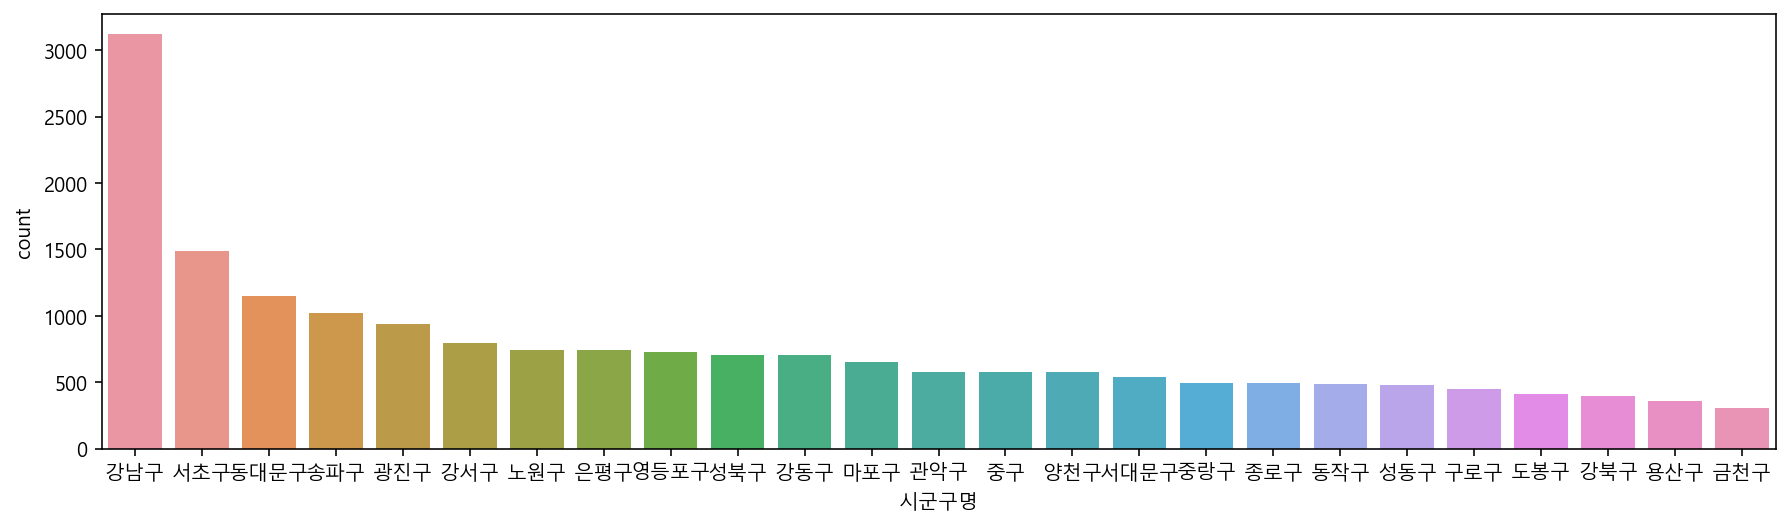

In [253]:
# seaborn 의 countplot 을 사용해서 위에서 만든 df_seoul 데이터프레임의
# 시군구명을 시각화 합니다.
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul,x = "시군구명", order=df_seoul["시군구명"].value_counts().index)


<AxesSubplot:xlabel='경도', ylabel='위도'>

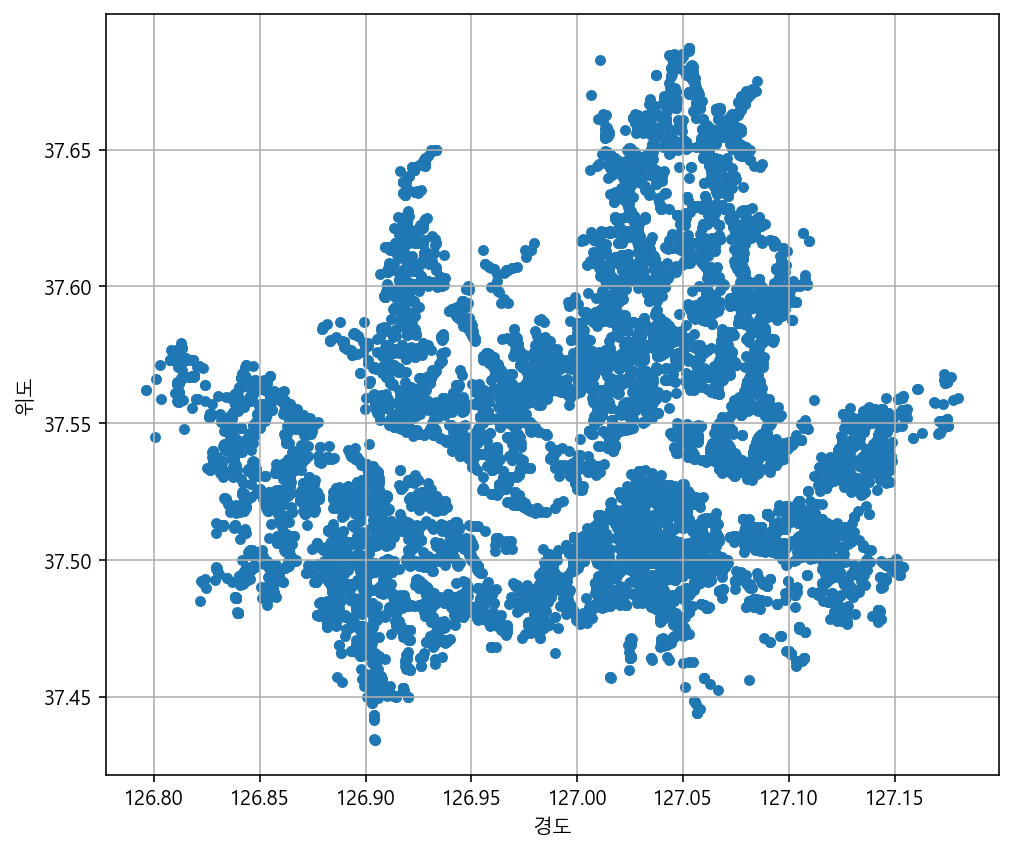

In [255]:
# Pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다.
# scatter는 x축과 y축이 꼭 들어가야 한다

df_seoul[["경도","위도","시군구명"]].plot.scatter(x="경도" , y="위도", figsize=(8,7), grid = True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

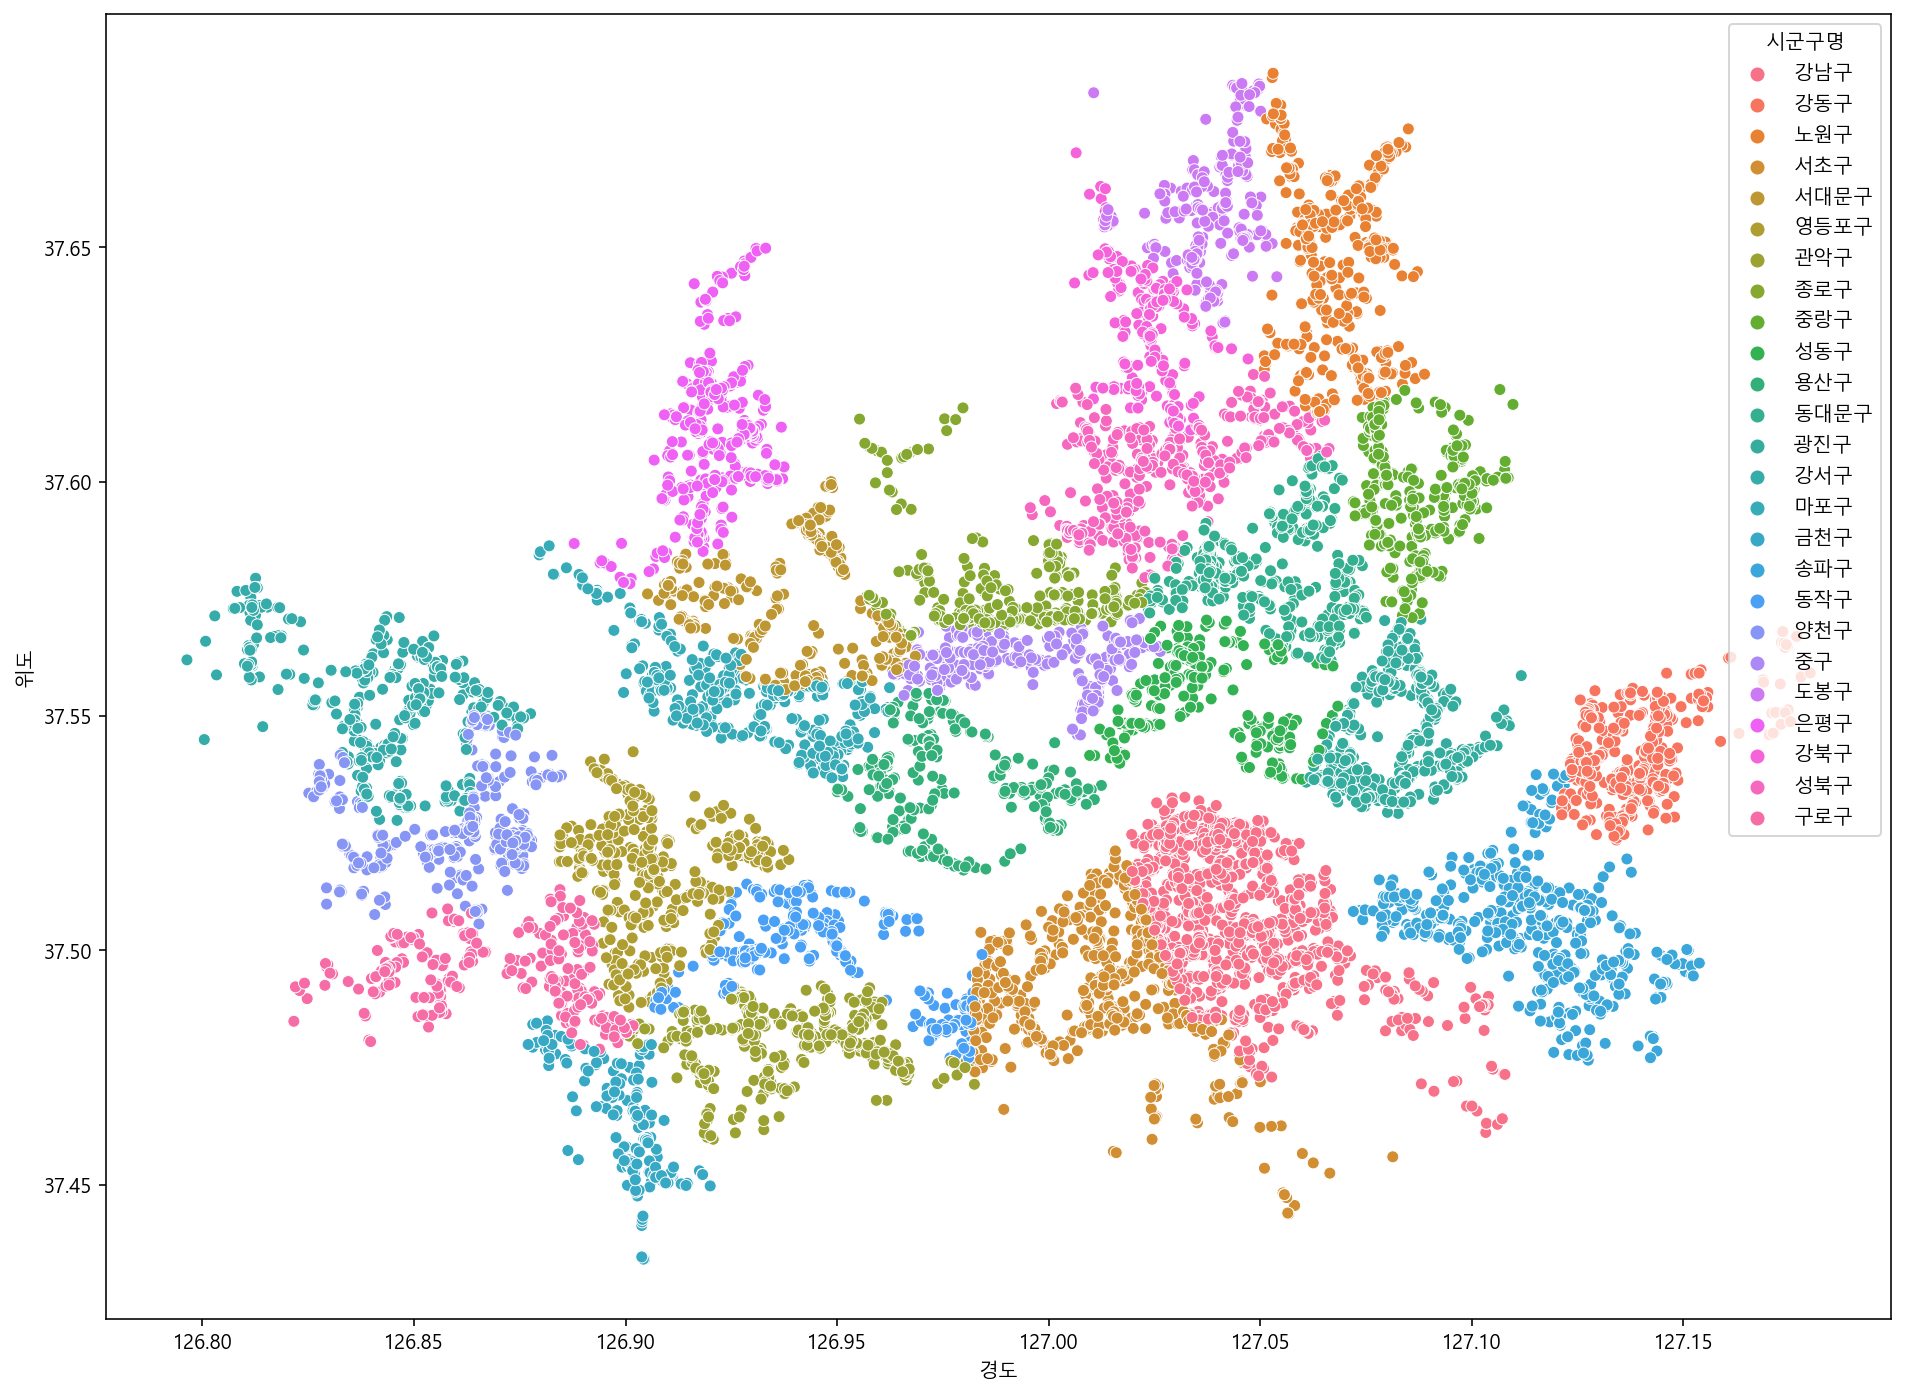

In [257]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_seoul,x="경도", y="위도", hue="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

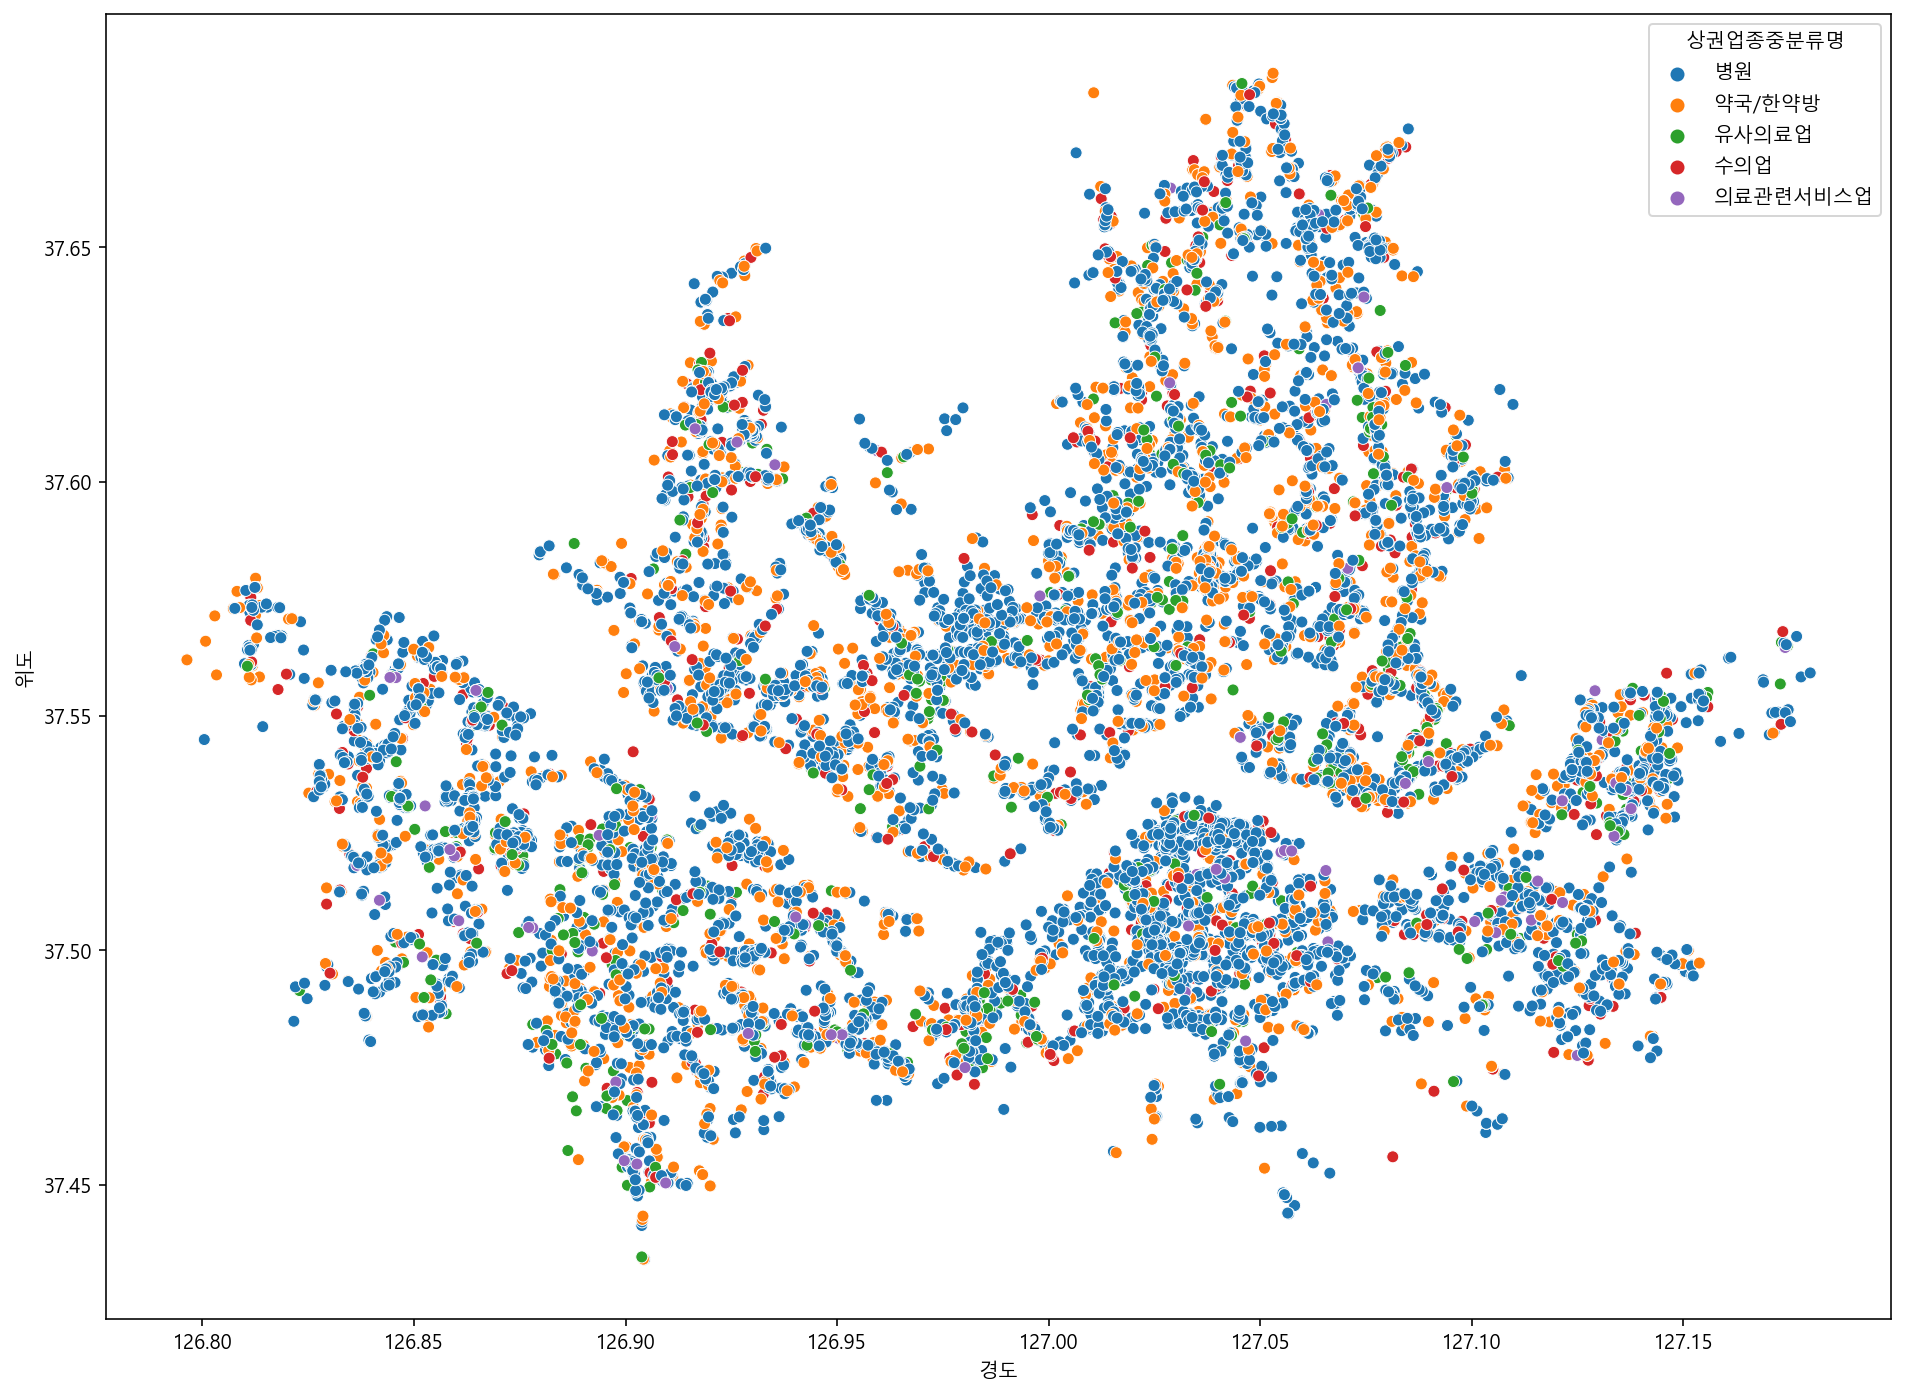

In [258]:
# seaborn의 scatterplot 을 통해 "상권업종중분류명" 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_seoul,x="경도", y="위도", hue="상권업종중분류명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

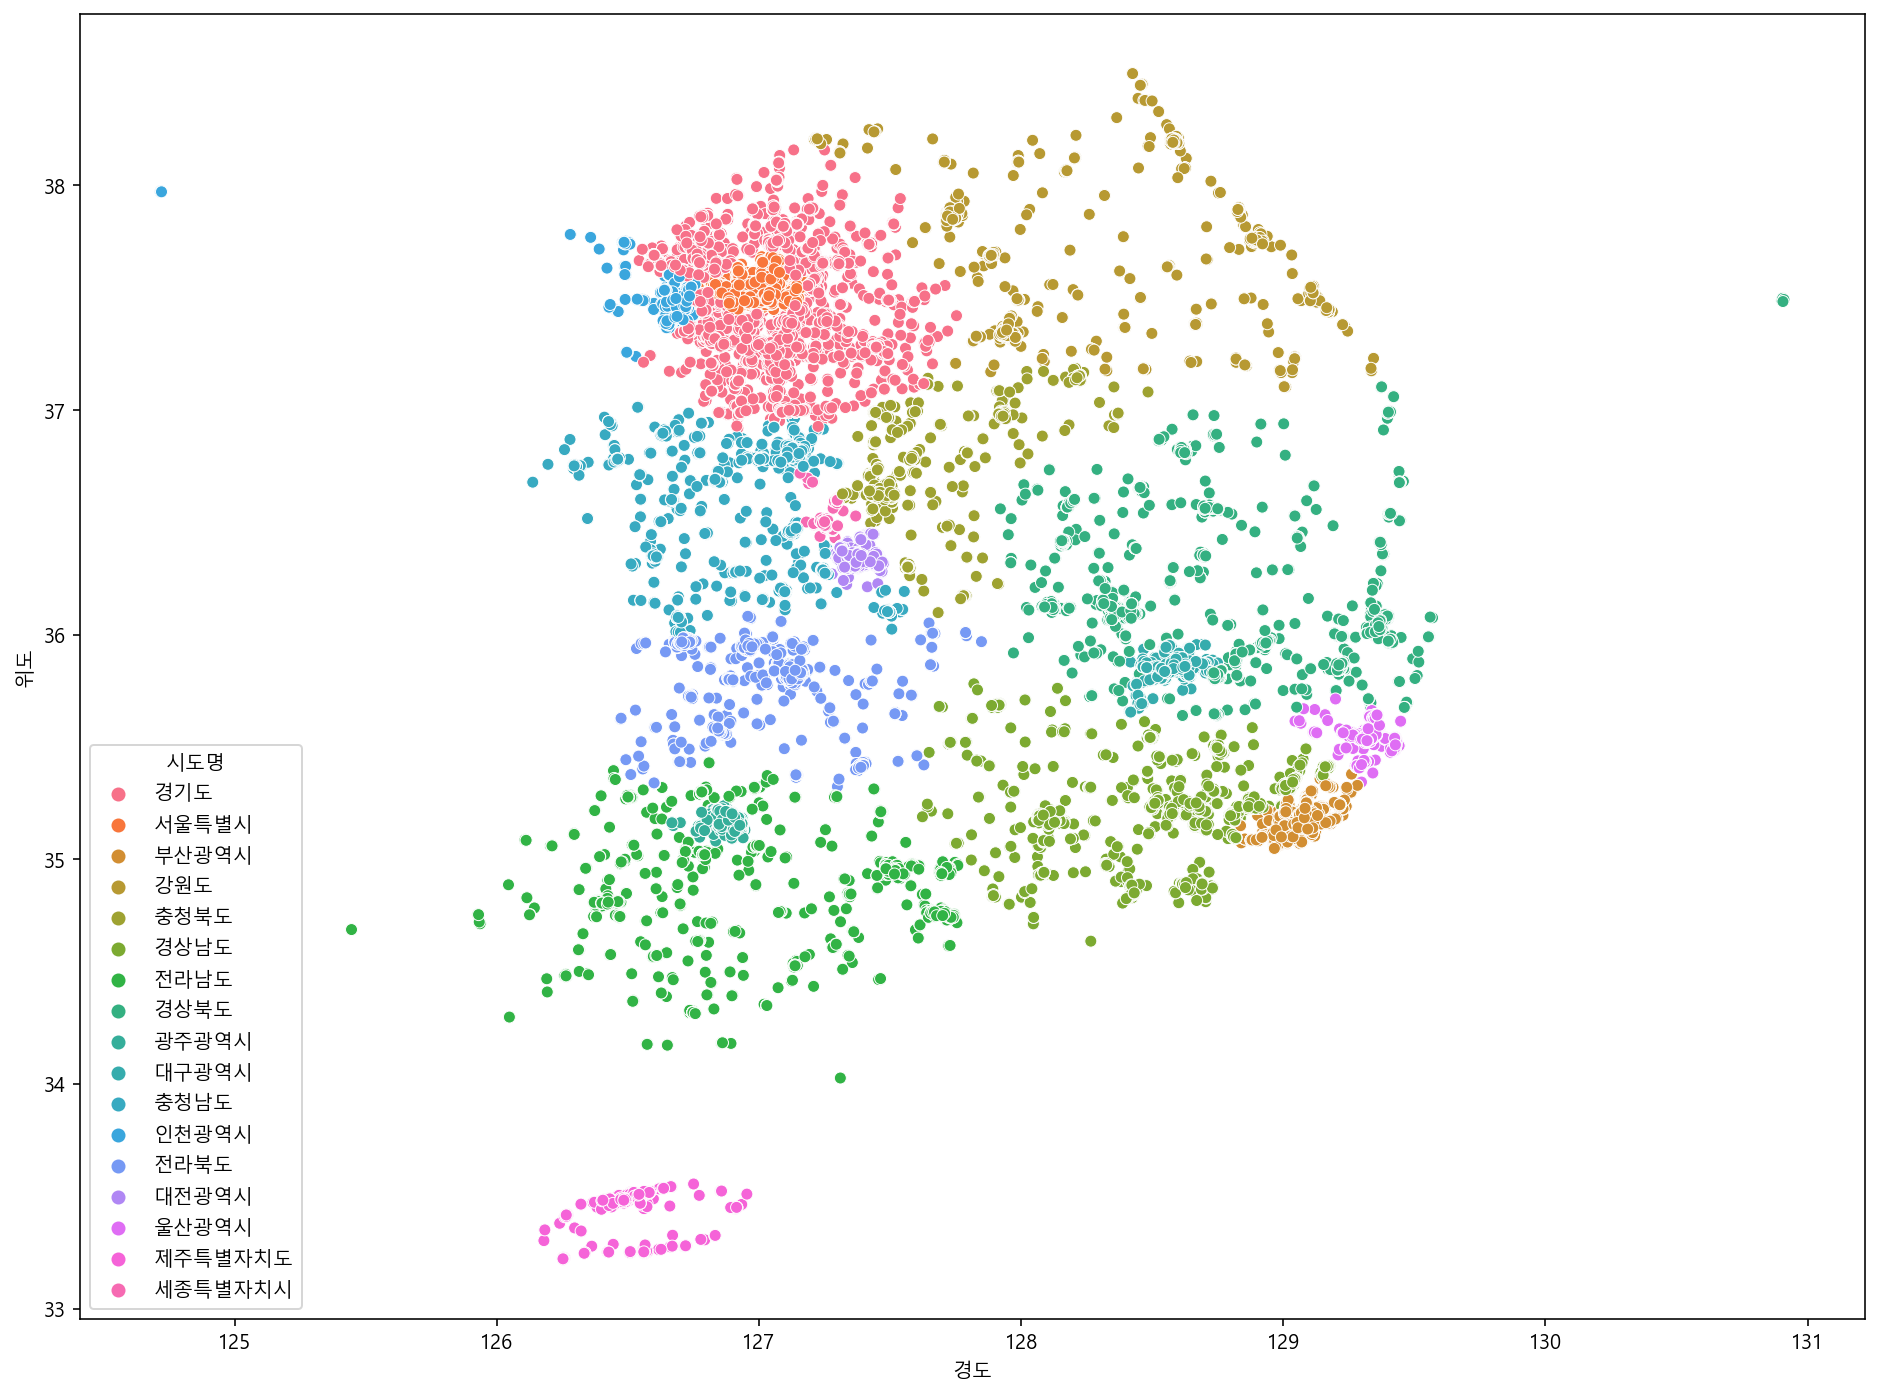

In [261]:
# seaborn의 scatterplot 을 통해 전국 데이터(df)로 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df,x="경도", y="위도", hue="시도명")


## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://t1.daumcdn.net/cfile/tistory/99576B4A5B751DC902">

검은색 프롬프트 창에 아래 명령어를 통해 folium 을 설치합니다.


`conda install -c conda-forge folium`

### Folium 사용예제
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/


In [263]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리

import folium


In [268]:
# geo_df 에 df_seoul_hospital 을 copy() 로 복사해서 할당합니다.

h = df_seoul_hospital["위도"].mean()
p = df_seoul_hospital["경도"].mean()

In [280]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
map = folium.Map(location=[h,p], zoom_start = 12)

for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n,"상호명"]
    address = df_seoul_hospital.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[n, "위도"],df_seoul_hospital.loc[n, "경도"]]
    folium.Marker(location =location,popup = popup,  ).add_to(map)
    
map

## 좀 더 분석해 보기
* 상권업종중분류명, 상권업종소분류명 중에 관심 있는 분류명을 색인 후에 시도별, 시군구별 분석을 해보세요.
* 예시) 
    * 언어치료는 시군구별로 어디에 많이 위치할까?
    * 의료시설은 서울과 강남에 집중되어 있을까?
    * 강남에는 피부과, 성형외과가 다른 지역에 비해 많을까?